In [1]:
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from configuration import config
config.pythonpath_fix()



def pil_from_tensor(tensor):
    return transforms.ToPILImage()(tensor)
    
def tensor_from_pil(img):
    return transforms.ToTensor()(img)

def show_tensor(tensor_img):
    plt.imshow(pil_from_tensor(tensor_img), cmap='gray', vmin=0, vmax=255)

In [10]:
from deepscm.datasets.morphomnist.transforms import SetThickness, ImageMorphology
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms


image = dataset[3]["image"]

morph = ImageMorphology(image, scale=16)
tmp_morphed_img = np.float32(SetThickness(1)(morph)) 
morphed_img = torch.as_tensor(morph.downscale(tmp_morphed_img))
images = torch.cat([image, morphed_img])
grid = make_grid(images, range=(0., 1.))
show_tensor(grid)



NameError: name 'dataset' is not defined

torch.Size([16, 1, 28, 28])


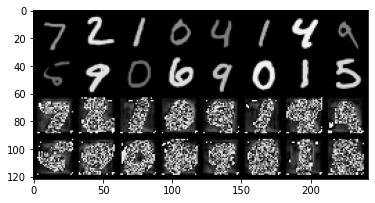

In [5]:
from ccbir.data import MorphoMNISTLikeDataModule
from ccbir.models import MNISTDummyVAE
from torchvision.utils import make_grid
from torchvision import transforms

model = MNISTDummyVAE.load_from_checkpoint('/homes/mb8318/Documents/year4/ccbir/ccbir/lightning_logs/version_32/checkpoints/epoch=0-step=843.ckpt')

dm = MorphoMNISTLikeDataModule(normalize=True)
dm.prepare_data()
dm.setup()
data_loader = dm.test_dataloader()
batch = next(iter(data_loader))
images = batch['image'][:16]
print(images.shape)
show_tensor(make_grid(images, range=(0., 1.)))

reconstructions = model(images)
show_tensor(make_grid(torch.cat([images, reconstructions])))

unprocessed = batch['image'][0]

